In [1]:
# Importing All Required Packages

import pandas as pd                                # For data manipulation
import numpy as np                                 # For Numerical Analysis
import matplotlib.pyplot as plt                    # For Graph Plotting Purpose
import seaborn as sns                              # Sub-package of matplotlib - advanced plotting
from scipy.stats import shapiro                    # For Testing Normality Shapiro test is used
from scipy.stats import mannwhitneyu               # As a Non parametric equivalent test of t test
from scipy.stats import pearsonr                   # For checking Correlation between variables
from scipy.stats import ttest_ind as ttest         # T test, used for parametric distribution
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the MainData data sheet from 'CTScanProjectCompleteData.xlsx' file as data

data = pd.read_excel('Personal_Project/ResearchPaperCTScanProjectData.xlsx', sheet_name = 'MainData')
data.set_index('RegNo', inplace = True)
data.head()

,SLNO,Name,Age,Gender,Collect Date,Disease,Group,Comorbidities,Smoking,Smoking Years,...,Fatty Layer at Right Atrium Max Visible Level,DA,TCS,FL,RA,LA,TCS_DA,LA_DA,LA_TCS,(TCS-LA)_DA
RegNo,,,,,,,,,,,,,,,,,,,,,
NE1724,1,Mita Chakraborty,51,F,22.07.2024,COPD,Diseased,"HTN, HTY, TB",Never,0,...,2086,1571,18655,2158,5897,6296,11.875,4.008,0.337,7.867
ND8368,2,Uttam Kumar Sinha,58,M,22.07.2024,COPD,Diseased,NaN,Ex_smoker,35,...,4953,1519,20863,3795,6587,5918,13.735,3.896,0.284,9.839
NE0587,3,Mrinmoy Dey,42,M,24.07.2024,COPD,Diseased,DM,Smoker,20,...,2784,1306,16305,2263,4522,4926,12.485,3.772,0.302,8.713
NE1573,4,Arun Kumar Dutta,63,M,24.07.2024,COPD,Diseased,HTN,Ex_smoker,30,...,2353,1341,17438,2549,3339,5143,13.004,3.835,0.295,9.169
NC4307,5,Paritosh Sadhukhan,67,M,20.07.2024,COPD,Diseased,"HTN, DM, LOA",Never,0,...,3419,1348,14961,3750,4479,4900,11.099,3.635,0.328,7.464


In [3]:
# Shape of the data frame

data.shape

(54, 41)

In [4]:
# Creating a precise data frame for work
# Drop the columns - 'SLNO', 'Name', 'CTDate'

drop_cols = ['SLNO','Name', 'CTDate', 'Collect Date']
data_precise = data.drop(drop_cols, axis = 1)

In [5]:
# Check the Last few entries of the data frame

data_precise.tail()

,Age,Gender,Disease,Group,Comorbidities,Smoking,Smoking Years,SBP(mm Hg),DBP(mm Hg),Height(m),...,Fatty Layer at Right Atrium Max Visible Level,DA,TCS,FL,RA,LA,TCS_DA,LA_DA,LA_TCS,(TCS-LA)_DA
RegNo,,,,,,,,,,,,,,,,,,,,,
NE6931,63,F,Healthy,Normal,Post-Covid,Never,0,120,70,1.450,...,2674,1056,10449,1988,2688,2982,9.895,2.824,0.285,7.071
NE6936,46,M,Healthy,Normal,"PTB,Asthma",Smoker,16,130,90,1.625,...,2253,1053,10851,1923,1685,2978,10.305,2.828,0.274,7.477
A5831,82,F,Healthy,Normal,"Post-Covid,DM,HTN,SOB",Never,0,120,70,1.410,...,2166,1091,10374,1865,1515,2976,9.509,2.728,0.287,6.781
NE6973,69,M,Healthy,Normal,"SOB,Cough",Never,0,130,70,1.590,...,2046,1099,10554,2028,2077,2970,9.603,2.702,0.281,6.901
NE6974,68,M,Healthy,Normal,"Cough,SOB",Smoker,40,140,70,1.640,...,2008,1098,10497,1961,2074,2966,9.560,2.701,0.283,6.859


In [6]:
# Checking any missing values in important variables

data_precise[['DA','RA','LA','TCS','FL','TCS_DA','LA_DA','LA_TCS','(TCS-LA)_DA']].isnull().sum()

DA             0
RA             0
LA             0
TCS            0
FL             0
TCS_DA         0
LA_DA          0
LA_TCS         0
(TCS-LA)_DA    0
dtype: int64

In [7]:
# Get the Column names of the data frame

data_precise.columns

Index(['Age', 'Gender', 'Disease', 'Group', 'Comorbidities', 'Smoking',
       'Smoking Years', 'SBP(mm Hg)', 'DBP(mm Hg)', 'Height(m)', 'Weight(Kg)',
       'BMI(Kg/m2)', 'PR(Rest)', 'PR(After Ex)', 'SPO2(Rest)',
       'SPO2(After Ex)', 'Descending Aorta at Hila Level',
       'Total Cardiac Shadow at Hila Level', 'Fatty Layer at Hila Level',
       'Descending Aorta at RPA Drainage Level',
       'Left Atrium at RPA Drainage Level',
       'Total Cardiac Shadow at RPA Drainage Level',
       'Fatty Layer at RPA Drainage Level',
       'Descending Aorta at Right Atrium Max Visible Level',
       'Right Atrium at Right Atrium Max Visible Level',
       'Left Atrium at Right Atrium Max Visible Level',
       'Total Cardiac Shadow Right Atium Max Visible Level',
       'Fatty Layer at Right Atrium Max Visible Level', 'DA', 'TCS', 'FL',
       'RA', 'LA', 'TCS_DA', 'LA_DA', 'LA_TCS', '(TCS-LA)_DA'],
      dtype='object')

#### Null and Alternate Hypothesis of Shapiro test
* Null Hypothesis (H_0): The data under consideration comes from a normal disribution - the data is normally distributed
* Alternate Hypothesis (H_1): The data under consideration doesn't come from a normal distribution - the data is not normally distributed

* In general, critical level (alpha) is taken as 0.05. If the P-value is less than or equal to 0.05, (the probability that the null hypothesis is true is less than or equal to 0.05), we reject the null hypothesis. Otherwise we accept it.

In [8]:
# Creating a Dictionary to store results

# Creating a data_num data frame for variables under consideration

data_num = data_precise[['DA','LA','RA','TCS','FL','TCS_DA','LA_DA','LA_TCS','(TCS-LA)_DA']]

results = {'Column': [] , 'Result': [] , 'P-Value': [] , 'Alpha': [] , 'Test Statistic': [] }

# Set the Critical Level (alpha) to 0.05

alpha = 0.05

# Perform Shapiro-Wilk test for each column

for column in data_num.columns:
    stat, p_value = shapiro(data_num[column])
    result = 'Normal' if p_value > alpha else 'Not Normal'

    # Append results to the dictionary (Inside the For loop)

    results['Column'].append(column)
    results['Result'].append(result)
    results['P-Value'].append(np.round(p_value,6))
    results['Alpha'].append(alpha)
    results['Test Statistic'].append(stat)

# Create a DataFrame from the results dictionary

normality_results = pd.DataFrame(results)

# Display the results DataFrame

normality_results

,Column,Result,P-Value,Alpha,Test Statistic
0,DA,Not Normal,0.000028,0.05,0.868621
1,LA,Not Normal,0.000057,0.05,0.878765
2,RA,Not Normal,0.000072,0.05,0.882099
3,TCS,Not Normal,0.000015,0.05,0.859870
4,FL,Not Normal,0.001796,0.05,0.922098
5,TCS_DA,Normal,0.082714,0.05,0.961770
6,LA_DA,Not Normal,0.012197,0.05,0.942783
7,LA_TCS,Not Normal,0.023749,0.05,0.949536
8,(TCS-LA)_DA,Normal,0.867393,0.05,0.988105


## Creating three different data frames for Normal, copd and copd_ph using data_precise

In [9]:
# Separating the data frames

normal = data_precise[data_precise['Group'] == 'Normal']
diseased = data_precise[data_precise['Group'] == 'Diseased']
copd = data_precise[data_precise['Disease'] == 'COPD']
copd_ph = data_precise[data_precise['Disease'] == 'COPD_PH']

# Check the shapes of data frames

print('Shape of the normal data frame is', normal.shape)
print('Shape of the diseased data frame is', diseased.shape)
print('Shape of the copd data frame is', copd.shape)
print('Shape of the copd_ph data frame is', copd_ph.shape)

Shape of the normal data frame is (24, 37)
Shape of the diseased data frame is (30, 37)
Shape of the copd data frame is (15, 37)
Shape of the copd_ph data frame is (15, 37)


In [10]:
# Summary Statistics for Normal data

normal[['DA', 'LA', 'RA', 'TCS', 'FL', 'TCS_DA', 'LA_DA', 'LA_TCS', '(TCS-LA)_DA']].describe()

,DA,LA,RA,TCS,FL,TCS_DA,LA_DA,LA_TCS,(TCS-LA)_DA
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1048.291667,2894.958333,1549.333333,9640.708333,1722.166667,9.194208,2.760417,0.301958,6.433833
std,30.610426,201.411644,338.304811,819.905057,217.259946,0.713021,0.156821,0.030527,0.728687
min,1005.000000,2313.000000,1125.000000,7479.000000,1308.000000,7.442000,2.279000,0.259000,4.678000
25%,1021.000000,2777.750000,1351.750000,9179.750000,1519.250000,8.804000,2.701750,0.282500,6.048000
50%,1047.500000,2973.000000,1500.000000,9562.500000,1766.500000,9.154500,2.763500,0.297500,6.430500
75%,1065.750000,2995.750000,1626.750000,10341.750000,1887.000000,9.647250,2.847250,0.317250,6.887500
max,1103.000000,3195.000000,2688.000000,10851.000000,2028.000000,10.305000,2.994000,0.377000,7.486000


In [11]:
# Summary Statistics for Diseased data

diseased[['DA', 'LA', 'RA', 'TCS', 'FL', 'TCS_DA', 'LA_DA', 'LA_TCS', '(TCS-LA)_DA']].describe()

,DA,LA,RA,TCS,FL,TCS_DA,LA_DA,LA_TCS,(TCS-LA)_DA
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1412.000000,5173.133333,4870.266667,17329.533333,3092.666667,12.293667,3.676967,0.299600,8.616800
std,88.374985,531.412674,1007.288848,1360.238056,685.180889,0.922130,0.435098,0.032276,0.836854
min,1225.000000,4504.000000,3277.000000,14653.000000,1935.000000,10.641000,2.827000,0.248000,7.197000
25%,1342.750000,4788.250000,4314.500000,16526.500000,2642.500000,11.659500,3.388000,0.284250,8.127000
50%,1406.000000,5006.000000,4532.000000,17341.000000,2960.500000,12.203500,3.588500,0.293000,8.477500
75%,1480.750000,5385.750000,5648.500000,17908.000000,3659.250000,12.795750,3.883500,0.323250,8.972750
max,1593.000000,6629.000000,6747.000000,20863.000000,4659.000000,14.459000,4.973000,0.399000,10.775000


In [12]:
# Summary statistics for copd data

copd[['DA', 'LA', 'RA', 'TCS', 'FL', 'TCS_DA', 'LA_DA', 'LA_TCS', '(TCS-LA)_DA']].describe()

,DA,LA,RA,TCS,FL,TCS_DA,LA_DA,LA_TCS,(TCS-LA)_DA
count,15.0000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1418.4000,5138.866667,4992.200000,17630.933333,3218.600000,12.439133,3.628800,0.292467,8.810400
std,86.4637,524.539372,930.472169,1562.215207,686.998836,0.934558,0.348292,0.028573,0.865916
min,1306.0000,4504.000000,3339.000000,14961.000000,2158.000000,11.099000,2.827000,0.251000,7.464000
25%,1344.5000,4796.500000,4473.500000,16704.500000,2701.500000,11.879000,3.478000,0.279000,8.401000
50%,1398.0000,4926.000000,4736.000000,17438.000000,3257.000000,12.485000,3.635000,0.288000,8.713000
75%,1445.5000,5202.500000,5692.500000,18265.500000,3729.500000,12.907500,3.814500,0.310500,9.266500
max,1593.0000,6296.000000,6632.000000,20863.000000,4659.000000,14.459000,4.295000,0.337000,10.775000


In [13]:
# Summary statistics for copd_ph data

copd_ph[['DA', 'LA', 'RA', 'TCS', 'FL', 'TCS_DA', 'LA_DA', 'LA_TCS', '(TCS-LA)_DA']].describe()

,DA,LA,RA,TCS,FL,TCS_DA,LA_DA,LA_TCS,(TCS-LA)_DA
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1405.600000,5207.400000,4748.333333,17028.133333,2966.733333,12.148200,3.725133,0.306733,8.423200
std,92.813792,554.357775,1097.313711,1094.293371,683.028599,0.917956,0.515620,0.035107,0.787748
min,1225.000000,4621.000000,3277.000000,14653.000000,1935.000000,10.641000,3.203000,0.248000,7.197000
25%,1345.500000,4788.500000,3967.000000,16434.000000,2642.000000,11.584500,3.357000,0.286500,7.962000
50%,1414.000000,5020.000000,4528.000000,17090.000000,2823.000000,12.196000,3.503000,0.312000,8.322000
75%,1489.000000,5392.000000,5588.000000,17517.000000,3190.500000,12.501500,4.015500,0.324000,8.823000
max,1516.000000,6629.000000,6747.000000,19304.000000,4532.000000,13.718000,4.973000,0.399000,10.269000


## Compairing columns for Normal and Diseased data. The columns that are to be compared -
* 'DA' - Not Normal - Mann Whitney U test
* 'LA' - Not Normal - Mann Whitney U test
* 'RA' - Not Normal - Mann Whitney U test
* 'TCS' - Not Normal - Mann Whitney U test
* 'FL' - Not Normal - Mann Whitney U test
* 'TCS_DA' - Normal - T test
* 'LA_DA' - Not Normal - Mann Whitney U test
* 'LA_TCS' - Not Normal - Mann Whitney U test
* '(TCS-LA)_DA' - Not Normal - Mann Whitney U test


In [14]:
# Compairing for the Column 'DA'
stat_da, p_da = mannwhitneyu(normal['DA'], diseased['DA'])

print('The Test Statistics Value for DA for Normal v/s Diseased Group is:', stat_da)
print('The P-Value for DA for Normal v/s Diseased Group is:', p_da)

alpha = 0.05

if p_da <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_da = {'Variable': 'Descending Aorta',
             'Alpha': 0.05,
             'Statistics': stat_da,
             'Mean_Normal': np.mean(normal['DA']),
             'Mean_Diseased': np.mean(diseased['DA']),
             'P Value': p_da,
             'Result': 'Not Identical Groups'}

result_da = pd.DataFrame(result_da, index = [0])
result_da

The Test Statistics Value for DA for Normal v/s Diseased Group is: 0.0
The P-Value for DA for Normal v/s Diseased Group is: 3.879324264625345e-10
Not Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_Normal,Mean_Diseased,P Value,Result
0,Descending Aorta,0.05,0.0,1048.291667,1412.0,3.879324e-10,Not Identical Groups


In [15]:
# Compairing for the Column 'LA'
stat_la, p_la = mannwhitneyu(normal['LA'], diseased['LA'])

print('The Test Statistics Value for LA for Normal v/s Diseased Group is:', stat_la)
print('The P-Value for LA for Normal v/s Diseased Group is:', p_la)

alpha = 0.05

if p_la <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_la = {'Variable': 'Left Atrium',
             'Alpha': 0.05,
             'Statistics': stat_la,
             'Mean_Normal': np.mean(normal['LA']),
             'Mean_Diseased': np.mean(diseased['LA']),
             'P Value': p_la,
             'Result': 'Not Identical Groups'}

result_la = pd.DataFrame(result_la, index = [1])
result_la

The Test Statistics Value for LA for Normal v/s Diseased Group is: 0.0
The P-Value for LA for Normal v/s Diseased Group is: 3.89418708719127e-10
Not Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_Normal,Mean_Diseased,P Value,Result
1,Left Atrium,0.05,0.0,2894.958333,5173.133333,3.894187e-10,Not Identical Groups


In [16]:
# Compairing for the Column 'RA'
stat_ra, p_ra = mannwhitneyu(normal['RA'], diseased['RA'])

print('The Test Statistics Value for RA for Normal v/s Diseased Group is:', stat_ra)
print('The P-Value for RA for Normal v/s Diseased Group is:', p_ra)

alpha = 0.05

if p_ra <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_ra = {'Variable': 'Right Atrium',
             'Alpha': 0.05,
             'Statistics': stat_ra,
             'Mean_Normal': np.mean(normal['RA']),
             'Mean_Diseased': np.mean(diseased['RA']),
             'P Value': p_ra,
             'Result': 'Not Identical Groups'}

result_ra = pd.DataFrame(result_ra, index = [2])
result_ra

The Test Statistics Value for RA for Normal v/s Diseased Group is: 0.0
The P-Value for RA for Normal v/s Diseased Group is: 3.8971658040988515e-10
Not Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_Normal,Mean_Diseased,P Value,Result
2,Right Atrium,0.05,0.0,1549.333333,4870.266667,3.897166e-10,Not Identical Groups


In [17]:
# Compairing for the Column 'TCS'
stat_tcs, p_tcs = mannwhitneyu(normal['TCS'], diseased['TCS'])

print('The Test Statistics Value for TCS for Normal v/s Diseased Group is:', stat_tcs)
print('The P-Value for TCS for Normal v/s Diseased Group is:', p_tcs)

alpha = 0.05

if p_tcs <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_tcs = {'Variable': 'Total Cardiac Shadow',
             'Alpha': 0.05,
             'Statistics': stat_tcs,
              'Mean_Normal': np.mean(normal['TCS']),
             'Mean_Diseased': np.mean(diseased['TCS']),
             'P Value': p_tcs,
             'Result': 'Not Identical Groups'}

result_tcs = pd.DataFrame(result_tcs, index = [3])
result_tcs

The Test Statistics Value for TCS for Normal v/s Diseased Group is: 0.0
The P-Value for TCS for Normal v/s Diseased Group is: 3.8971658040988515e-10
Not Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_Normal,Mean_Diseased,P Value,Result
3,Total Cardiac Shadow,0.05,0.0,9640.708333,17329.533333,3.897166e-10,Not Identical Groups


In [18]:
# Compairing for the Column 'FL'
stat_fl, p_fl = mannwhitneyu(normal['FL'], diseased['FL'])

print('The Test Statistics Value for FL for Normal v/s Diseased Group is:', stat_fl)
print('The P-Value for FL for Normal v/s Diseased Group is:', p_fl)

alpha = 0.05

if p_fl <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_fl = {'Variable': 'Fatty Layer',
             'Alpha': 0.05,
             'Statistics': stat_fl,
             'Mean_Normal': np.mean(normal['FL']),
             'Mean_Diseased': np.mean(diseased['FL']),
             'P Value': p_fl,
             'Result': 'Not Identical Groups'}

result_fl = pd.DataFrame(result_fl, index = [4])
result_fl

The Test Statistics Value for FL for Normal v/s Diseased Group is: 7.0
The P-Value for FL for Normal v/s Diseased Group is: 8.443671954880489e-10
Not Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_Normal,Mean_Diseased,P Value,Result
4,Fatty Layer,0.05,7.0,1722.166667,3092.666667,8.443672e-10,Not Identical Groups


In [19]:
# Compairing for the Column 'TCS_DA'
stat_tcsda, p_tcsda = ttest(normal['TCS_DA'], diseased['TCS_DA'])

print('The Test Statistics Value for TCS_DA for Normal v/s Diseased Group is:', stat_tcsda)
print('The P-Value for TCS_DA for Normal v/s Diseased Group is:', p_tcsda)

alpha = 0.05

if np.round(p_tcsda,2) <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_tcsda = {'Variable': 'TCS/DA',
             'Alpha': 0.05,
             'Statistics': stat_tcsda,
             'Mean_Normal': np.mean(normal['TCS_DA']),
             'Mean_Diseased': np.mean(diseased['TCS_DA']),
             'P Value': np.round(p_tcsda,2),
             'Result': 'Not Identical Groups'}

result_tcsda = pd.DataFrame(result_tcsda, index = [5])
result_tcsda

The Test Statistics Value for TCS_DA for Normal v/s Diseased Group is: -13.535965267538582
The P-Value for TCS_DA for Normal v/s Diseased Group is: 1.125873529538836e-18
Not Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_Normal,Mean_Diseased,P Value,Result
5,TCS/DA,0.05,-13.535965,9.194208,12.293667,0.0,Not Identical Groups


In [20]:
# Compairing for the Column 'LA_DA'
stat_lada, p_lada = mannwhitneyu(normal['LA_DA'], diseased['LA_DA'])

print('The Test Statistics Value for LA_DA for Normal v/s Diseased Group is:', stat_lada)
print('The P-Value for LA_DA for Normal v/s Diseased Group is:', p_lada)

alpha = 0.05

if p_lada <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_lada = {'Variable': 'LA/DA',
             'Alpha': 0.05,
             'Statistics': stat_lada,
             'Mean_Normal': np.mean(normal['LA_DA']),
             'Mean_Diseased': np.mean(diseased['LA_DA']),
             'P Value': p_lada,
             'Result': 'Not Identical Groups'}

result_lada = pd.DataFrame(result_lada, index = [6])
result_lada

The Test Statistics Value for LA_DA for Normal v/s Diseased Group is: 10.0
The P-Value for LA_DA for Normal v/s Diseased Group is: 1.171255217547609e-09
Not Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_Normal,Mean_Diseased,P Value,Result
6,LA/DA,0.05,10.0,2.760417,3.676967,1.171255e-09,Not Identical Groups


In [21]:
# Compairing for the Column 'LA_TCS'
stat_latcs, p_latcs = mannwhitneyu(normal['LA_TCS'], diseased['LA_TCS'])

print('The Test Statistics Value for LA_TCS for Normal v/s Diseased Group is:', stat_latcs)
print('The P-Value for LA_TCS for Normal v/s Diseased Group is:', p_latcs)

alpha = 0.05

if p_latcs <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_lath = {'Variable': 'LA/TCS',
             'Alpha': 0.05,
             'Statistics': stat_latcs,
             'Mean_Normal': np.mean(normal['LA_TCS']),
             'Mean_Diseased': np.mean(diseased['LA_TCS']),
             'P Value': p_latcs,
             'Result': 'Identical Groups'}

result_latcs = pd.DataFrame(result_lath, index = [7])
result_latcs

The Test Statistics Value for LA_TCS for Normal v/s Diseased Group is: 358.0
The P-Value for LA_TCS for Normal v/s Diseased Group is: 0.9791599455954487
Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_Normal,Mean_Diseased,P Value,Result
7,LA/TCS,0.05,358.0,0.301958,0.2996,0.97916,Identical Groups


In [22]:
# Compairing for the Column '(TCS-LA)_DA'
stat_tcslada, p_tcslada = ttest(normal['(TCS-LA)_DA'], diseased['(TCS-LA)_DA'])

print('The Test Statistics Value for (TCS-LA)_DA for Normal v/s Diseased Group is:', stat_tcslada)
print('The P-Value for (TCS-LA)_DA for Normal v/s Diseased Group is:', p_tcslada)

alpha = 0.05

if p_tcslada <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_tcslada = {'Variable': '(TCS-LA)/DA',
             'Alpha': 0.05,
             'Statistics': stat_tcslada,
             'Mean_Normal': np.mean(normal['(TCS-LA)_DA']),
             'Mean_Diseased': np.mean(diseased['(TCS-LA)_DA']),
             'P Value': p_tcslada,
             'Result': 'Not Identical Groups'}

result_tcslada = pd.DataFrame(result_tcslada, index = [8])
result_tcslada

The Test Statistics Value for (TCS-LA)_DA for Normal v/s Diseased Group is: -10.079266922199064
The P-Value for (TCS-LA)_DA for Normal v/s Diseased Group is: 7.908782461316971e-14
Not Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_Normal,Mean_Diseased,P Value,Result
8,(TCS-LA)/DA,0.05,-10.079267,6.433833,8.6168,7.908782e-14,Not Identical Groups


In [23]:
# Concating all 9 data frames to give final result
# Final result of compairing 9 Variables across Normal and Diseased Groups

normal_vs_disease = pd.concat([result_da, result_la, result_ra, result_tcs, result_fl, result_tcsda, result_lada, result_latcs, result_tcslada], axis = 0)
normal_vs_disease.drop(['Statistics'],axis = 1, inplace = True)
normal_vs_disease

,Variable,Alpha,Mean_Normal,Mean_Diseased,P Value,Result
0,Descending Aorta,0.05,1048.291667,1412.000000,3.879324e-10,Not Identical Groups
1,Left Atrium,0.05,2894.958333,5173.133333,3.894187e-10,Not Identical Groups
2,Right Atrium,0.05,1549.333333,4870.266667,3.897166e-10,Not Identical Groups
3,Total Cardiac Shadow,0.05,9640.708333,17329.533333,3.897166e-10,Not Identical Groups
4,Fatty Layer,0.05,1722.166667,3092.666667,8.443672e-10,Not Identical Groups
5,TCS/DA,0.05,9.194208,12.293667,0.000000e+00,Not Identical Groups
6,LA/DA,0.05,2.760417,3.676967,1.171255e-09,Not Identical Groups
7,LA/TCS,0.05,0.301958,0.299600,9.791599e-01,Identical Groups
8,(TCS-LA)/DA,0.05,6.433833,8.616800,7.908782e-14,Not Identical Groups


## Graphical Representation of Variables for Normal versus Diseased Group

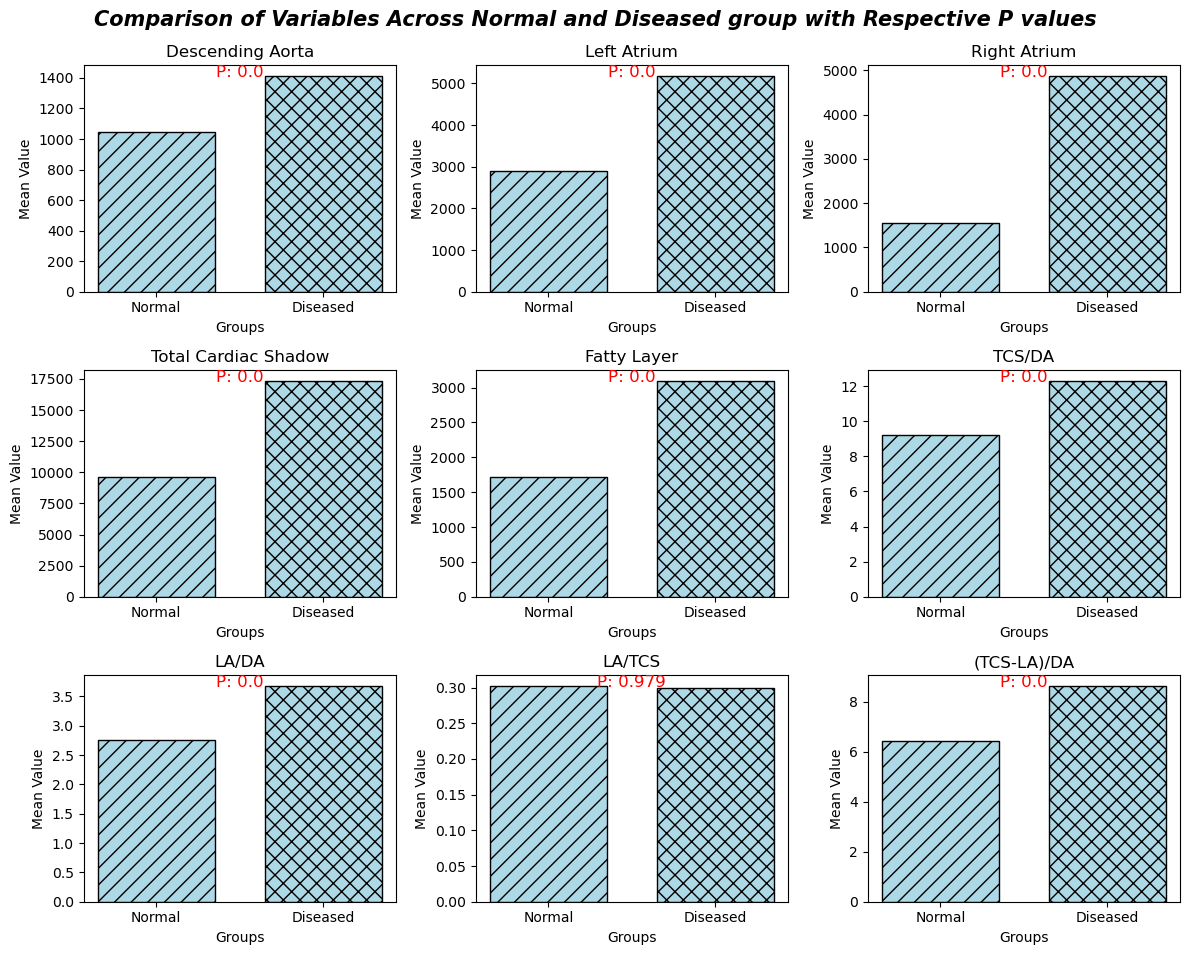

In [24]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define different hatch patterns for 'Normal' and 'Disease'
hatch_patterns = ['//', 'xx']

# Loop through the 9 variables and plot them
for i in range(9):
    variable_name = normal_vs_disease.loc[i, 'Variable']
    mean_normal = normal_vs_disease.loc[i, 'Mean_Normal']
    mean_disease = normal_vs_disease.loc[i, 'Mean_Diseased']
    p = np.round(normal_vs_disease.loc[i, 'P Value'],3)
    # Bar plot
    axes[i].bar(['Normal', 'Diseased'], [mean_normal, mean_disease], edgecolor = 'black', width = 0.7, color = 'lightblue',
                hatch = hatch_patterns)
    # Title of the plot with variable name
    axes[i].set_title(variable_name)
    # Add the p-value as text
    axes[i].text(0.5, max(mean_normal, mean_disease) * 1.05, f'P: {p}', ha='center', va='top', fontsize=12, color='red')
    # Set x-axis label
    axes[i].set_xlabel('Groups')
    # Set y-axis label
    axes[i].set_ylabel('Mean Value')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.suptitle('Comparison of Variables Across Normal and Diseased group with Respective P values', fontsize = 15, 
             fontweight = 'bold', fontstyle = 'italic')

# Add Title
# plt.title('Graphical Representation of The difference between Variables for Normal and Diseased Patients with P value')

# Show the plot
plt.show()

## Compairing columns for COPD and COPD_PH data. The columns that are to be compared -
* 'DA' - Not Normal - Mann Whitney U test
* 'LA' - Not Normal - Mann Whitney U test
* 'RA' - Not Normal - Mann Whitney U test
* 'TCS' - Not Normal - Mann Whitney U test
* 'FL' - Not Normal - Mann Whitney U test
* 'TCS_DA' - Normal - T test
* 'LA_DA' - Not Normal - Mann Whitney U test
* 'LA_TCS' - Not Normal - Mann Whitney U test
* '(TCS-LA)_DA' - Not Normal - Mann Whitney U test


In [25]:
# Compairing for the Column 'DA'
stat_da, p_da = mannwhitneyu(copd['DA'], copd_ph['DA'])

print('The Test Statistics Value for DA for COPD v/s COPD PH is:', stat_da)
print('The P-Value for DA for COPD v/s COPD PH is:', p_da)

alpha = 0.05

if p_da <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_da = {'Variable': 'Descending Aorta',
             'Alpha': 0.05,
             'Statistics': stat_da,
             'Mean_COPD': np.mean(copd['DA']),
             'Mean_COPDPH': np.mean(copd_ph['DA']),
             'P Value': p_da,
             'Result': 'Identical Groups'}

result_da = pd.DataFrame(result_da, index = [0])
result_da

The Test Statistics Value for DA for COPD v/s COPD PH is: 118.0
The P-Value for DA for COPD v/s COPD PH is: 0.8356870092411566
Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_COPD,Mean_COPDPH,P Value,Result
0,Descending Aorta,0.05,118.0,1418.4,1405.6,0.835687,Identical Groups


In [26]:
# Compairing for the Column 'LA'
stat_la, p_la = mannwhitneyu(copd['LA'], copd_ph['LA'])

print('The Test Statistics Value for LA for COPD v/s COPD PH is:', stat_la)
print('The P-Value for LA for COPD v/s COPD PH is:', p_la)

alpha = 0.05

if p_la <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_la = {'Variable': 'Left Atrium',
             'Alpha': 0.05,
             'Statistics': stat_la,
             'Mean_COPD': np.mean(copd['LA']),
             'Mean_COPDPH': np.mean(copd_ph['LA']),
             'P Value': p_la,
             'Result': 'Identical Groups'}

result_la = pd.DataFrame(result_la, index = [1])
result_la

The Test Statistics Value for LA for COPD v/s COPD PH is: 105.0
The P-Value for LA for COPD v/s COPD PH is: 0.7715511878155722
Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_COPD,Mean_COPDPH,P Value,Result
1,Left Atrium,0.05,105.0,5138.866667,5207.4,0.771551,Identical Groups


In [27]:
# Compairing for the Column 'RA'
stat_ra, p_ra = mannwhitneyu(copd['RA'], copd_ph['RA'])

print('The Test Statistics Value for RA for COPD v/s COPD PH is:', stat_ra)
print('The P-Value for RA for COPD v/s COPD PH is:', p_ra)

alpha = 0.05

if p_ra <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_ra = {'Variable': 'Right Atrium',
             'Alpha': 0.05,
             'Statistics': stat_ra,
             'Mean_COPD': np.mean(copd['RA']),
             'Mean_COPDPH': np.mean(copd_ph['RA']),
             'P Value': p_ra,
             'Result': 'Identical Groups'}

result_ra = pd.DataFrame(result_ra, index = [2])
result_ra

The Test Statistics Value for RA for COPD v/s COPD PH is: 130.0
The P-Value for RA for COPD v/s COPD PH is: 0.48073111045562256
Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_COPD,Mean_COPDPH,P Value,Result
2,Right Atrium,0.05,130.0,4992.2,4748.333333,0.480731,Identical Groups


In [28]:
# Compairing for the Column 'TCS'
stat_tcs, p_tcs = mannwhitneyu(copd['TCS'], copd_ph['TCS'])

print('The Test Statistics Value for TCS for COPD v/s COPD PH is:', stat_tcs)
print('The P-Value for TCS for COPD v/s COPD PH is:', p_tcs)

alpha = 0.05

if p_tcs <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_tcs = {'Variable': 'Total Cardiac Shadow',
             'Alpha': 0.05,
             'Statistics': stat_tcs,
             'Mean_COPD': np.mean(copd['TCS']),
             'Mean_COPDPH': np.mean(copd_ph['TCS']),
             'P Value': p_tcs,
             'Result': 'Identical Groups'}

result_tcs = pd.DataFrame(result_tcs, index = [3])
result_tcs

The Test Statistics Value for TCS for COPD v/s COPD PH is: 138.0
The P-Value for TCS for COPD v/s COPD PH is: 0.2997583700887151
Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_COPD,Mean_COPDPH,P Value,Result
3,Total Cardiac Shadow,0.05,138.0,17630.933333,17028.133333,0.299758,Identical Groups


In [29]:
# Compairing for the Column 'FL'
stat_fl, p_fl = mannwhitneyu(copd['FL'], copd_ph['FL'])

print('The Test Statistics Value for FL for COPD v/s COPD PH is:', stat_fl)
print('The P-Value for FL for COPD v/s COPD PH is:', p_fl)

alpha = 0.05

if p_fl <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_fl = {'Variable': 'Fatty Layer',
             'Alpha': 0.05,
             'Statistics': stat_fl,
             'Mean_COPD': np.mean(copd['FL']),
             'Mean_COPDPH': np.mean(copd_ph['FL']),
             'P Value': p_fl,
             'Result': 'Identical Groups'}

result_fl = pd.DataFrame(result_fl, index = [4])
result_fl

The Test Statistics Value for FL for COPD v/s COPD PH is: 138.0
The P-Value for FL for COPD v/s COPD PH is: 0.2997583700887151
Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_COPD,Mean_COPDPH,P Value,Result
4,Fatty Layer,0.05,138.0,3218.6,2966.733333,0.299758,Identical Groups


In [30]:
# Compairing for the Column 'TCS_DA'
stat_tcsda, p_tcsda = ttest(copd['TCS_DA'], copd_ph['TCS_DA'])

print('The Test Statistics Value for TCS_DA for COPD v/s COPD PH is:', stat_tcsda)
print('The P-Value for TCS_DA for COPD v/s COPD PH is:', p_tcsda)

alpha = 0.05

if p_tcsda <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_tcsda = {'Variable': 'TCS/DA',
             'Alpha': 0.05,
             'Statistics': stat_tcsda,
             'Mean_COPD': np.mean(copd['TCS_DA']),
             'Mean_COPDPH': np.mean(copd_ph['TCS_DA']),
             'P Value': p_tcsda,
             'Result': 'Identical Groups'}

result_tcsda = pd.DataFrame(result_tcsda, index = [5])
result_tcsda

The Test Statistics Value for TCS_DA for COPD v/s COPD PH is: 0.8601517959662188
The P-Value for TCS_DA for COPD v/s COPD PH is: 0.39701072622675315
Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_COPD,Mean_COPDPH,P Value,Result
5,TCS/DA,0.05,0.860152,12.439133,12.1482,0.397011,Identical Groups


In [31]:
# Compairing for the Column 'LA_DA'
stat_lada, p_lada = mannwhitneyu(copd['LA_DA'], copd_ph['LA_DA'])

print('The Test Statistics Value for LA_DA for COPD v/s COPD PH is:', stat_lada)
print('The P-Value for LA_DA for COPD v/s COPD PH is:', p_lada)

alpha = 0.05

if p_lada <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_lada = {'Variable': 'LA/DA',
             'Alpha': 0.05,
             'Statistics': stat_lada,
             'Mean_COPD': np.mean(copd['LA_DA']),
             'Mean_COPDPH': np.mean(copd_ph['LA_DA']),
             'P Value': p_lada,
             'Result': 'Identical Groups'}

result_lada = pd.DataFrame(result_lada, index = [6])
result_lada

The Test Statistics Value for LA_DA for COPD v/s COPD PH is: 115.0
The P-Value for LA_DA for COPD v/s COPD PH is: 0.9338864180775845
Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_COPD,Mean_COPDPH,P Value,Result
6,LA/DA,0.05,115.0,3.6288,3.725133,0.933886,Identical Groups


In [32]:
# Compairing for the Column 'LA_TCS'
stat_latcs, p_latcs = mannwhitneyu(copd['LA_TCS'], copd_ph['LA_TCS'])

print('The Test Statistics Value for LA_TCS for COPD v/s COPD PH is:', stat_latcs)
print('The P-Value for LA_TCS for COPD v/s COPD PH is:', p_latcs)

alpha = 0.05

if p_latcs <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_latcs = {'Variable': 'LA/TCS',
             'Alpha': 0.05,
             'Statistics': stat_latcs,
             'Mean_COPD': np.mean(copd['LA_TCS']),
             'Mean_COPDPH': np.mean(copd_ph['LA_TCS']),
             'P Value': p_latcs,
             'Result': 'Identical Groups'}

result_latcs = pd.DataFrame(result_latcs, index = [7])
result_latcs

The Test Statistics Value for LA_TCS for COPD v/s COPD PH is: 89.5
The P-Value for LA_TCS for COPD v/s COPD PH is: 0.35036579010257085
Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_COPD,Mean_COPDPH,P Value,Result
7,LA/TCS,0.05,89.5,0.292467,0.306733,0.350366,Identical Groups


In [33]:
# Compairing for the Column '(TCS-LA)_DA'
stat_tcslada, p_tcslada = mannwhitneyu(copd['(TCS-LA)_DA'], copd_ph['(TCS-LA)_DA'])

print('The Test Statistics Value for (TCS-LA)_DA for COPD v/s COPD PH is:', stat_tcslada)
print('The P-Value for (TCS-LA)_DA for COPD v/s COPD PH is:', p_tcslada)

alpha = 0.05

if p_tcslada <= alpha:
  print('Not Identical Groups')
else:
  print('Identical Groups')

print('--------------------------------------------------------------------------------------')

result_tcslada = {'Variable': '(TCS-LA)/DA',
             'Alpha': 0.05,
             'Statistics': stat_tcslada,
             'Mean_COPD': np.mean(copd['(TCS-LA)_DA']),
             'Mean_COPDPH': np.mean(copd_ph['(TCS-LA)_DA']),
             'P Value': p_tcslada,
             'Result': 'Identical Groups'}

result_tcslada = pd.DataFrame(result_tcslada, index = [8])
result_tcslada

The Test Statistics Value for (TCS-LA)_DA for COPD v/s COPD PH is: 145.0
The P-Value for (TCS-LA)_DA for COPD v/s COPD PH is: 0.1844100692216365
Identical Groups
--------------------------------------------------------------------------------------


,Variable,Alpha,Statistics,Mean_COPD,Mean_COPDPH,P Value,Result
8,(TCS-LA)/DA,0.05,145.0,8.8104,8.4232,0.18441,Identical Groups


In [34]:
# Compiling the Results for the COPD versus COPD PH group

copd_vs_copdph = pd.concat([result_da, result_la, result_ra, result_tcs, result_fl, result_tcsda, result_lada, result_latcs, result_tcslada], axis = 0)
copd_vs_copdph

,Variable,Alpha,Statistics,Mean_COPD,Mean_COPDPH,P Value,Result
0,Descending Aorta,0.05,118.000000,1418.400000,1405.600000,0.835687,Identical Groups
1,Left Atrium,0.05,105.000000,5138.866667,5207.400000,0.771551,Identical Groups
2,Right Atrium,0.05,130.000000,4992.200000,4748.333333,0.480731,Identical Groups
3,Total Cardiac Shadow,0.05,138.000000,17630.933333,17028.133333,0.299758,Identical Groups
4,Fatty Layer,0.05,138.000000,3218.600000,2966.733333,0.299758,Identical Groups
5,TCS/DA,0.05,0.860152,12.439133,12.148200,0.397011,Identical Groups
6,LA/DA,0.05,115.000000,3.628800,3.725133,0.933886,Identical Groups
7,LA/TCS,0.05,89.500000,0.292467,0.306733,0.350366,Identical Groups
8,(TCS-LA)/DA,0.05,145.000000,8.810400,8.423200,0.184410,Identical Groups


## Graphical Representation of Variables for COPD versus COPD PH Group

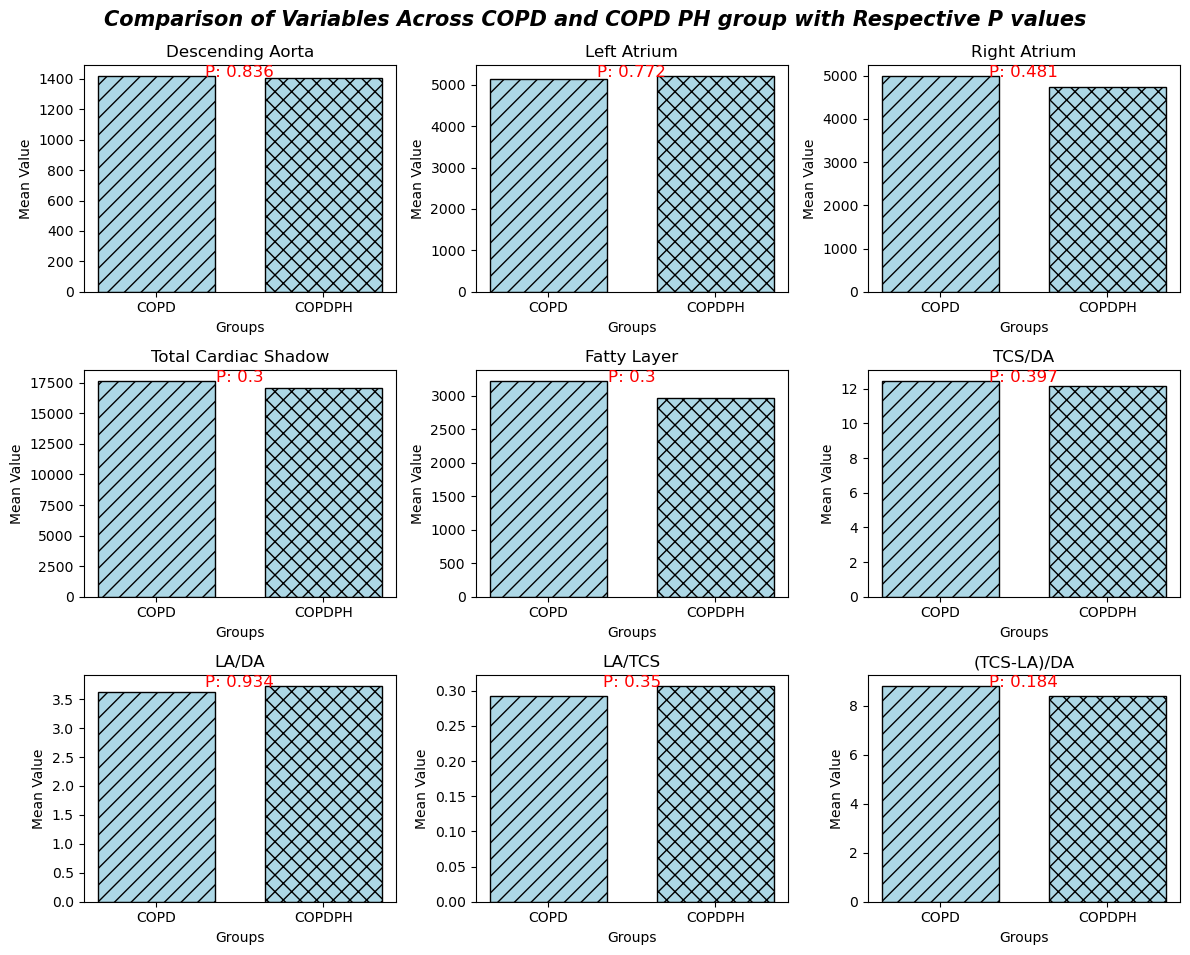

In [35]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define different hatch patterns for 'Normal' and 'Disease'
hatch_patterns = ['//', 'xx']

# Loop through the 9 variables and plot them
for i in range(9):
    variable_name = copd_vs_copdph.loc[i, 'Variable']
    mean_copd = copd_vs_copdph.loc[i, 'Mean_COPD']
    mean_copdph = copd_vs_copdph.loc[i, 'Mean_COPDPH']
    p = np.round(copd_vs_copdph.loc[i, 'P Value'],3)
    # Bar plot
    axes[i].bar(['COPD', 'COPDPH'], [mean_copd, mean_copdph], width = 0.7, edgecolor = 'black', color = 'lightblue',
                hatch = hatch_patterns)
    # Title of the plot with variable name
    axes[i].set_title(variable_name)
    # Add the p-value as text
    axes[i].text(0.5, max(mean_copd, mean_copdph) * 1.05, f'P: {p}', ha = 'center', va = 'top', fontsize = 12, color = 'red')
    # Set x-axis label
    axes[i].set_xlabel('Groups')
    # Set y-axis label
    axes[i].set_ylabel('Mean Value')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.suptitle('Comparison of Variables Across COPD and COPD PH group with Respective P values', fontsize = 15, 
             fontweight = 'bold', fontstyle = 'italic')

# Show the plot
plt.show()